# Plotting Representative data

In [163]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')

In [234]:
fluevaxdata = pd.read_csv('data/2013-2018_consolidated_flu_data.csv')

In [235]:
states = ['Alabama', 'Arkansas', 'Arizona', 'California', 
          'Colorado', 'Florida', 'Georgia', 'Illinois', 
          'Indiana', 'Louisiana', 'Massachusetts', 'Missouri', 
          'North Carolina', 'New Jersey', 'New York', 'Rhose Island', 
          'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Washington']

In [246]:
fluevaxdata = fluevaxdata[(fluevaxdata.stats.isin(['avg', 'LL', 'UL']) & 
                          (fluevaxdata.state_or_region.isin(states)) &
                          (fluevaxdata.race_or_age=='≥6 months')) &
                          (fluevaxdata.year != '2013-2014')]

In [247]:
fluevaxdata = fluevaxdata[~fluevaxdata.value.isin(["NR †", "NR *", "NR"])]

In [248]:
fluevaxdata.value = fluevaxdata.value.apply(float)

In [249]:
states_of_interest = ['California', 'New York']

In [250]:
fluevaxdata = fluevaxdata[fluevaxdata.state_or_region.isin(states_of_interest)]

In [251]:
pivot_data = pd.pivot_table(fluevaxdata, values='value', columns=['year', 'stats', 'state_or_region'], 
               index='month')
pivot_data = pivot_data.loc[['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan','Feb', 'Mar', 'Apr', 'May']]


In [252]:
pivot_data

year             2014-2015                                                   \
stats                   LL                  UL                 avg            
state_or_region California New York California New York California New York   
month                                                                         
Jul                    0.5      0.5        1.1      0.9        0.8      0.7   
Aug                    2.0      1.8        3.0      2.6        2.5      2.2   
Sep                    8.3      9.8       10.1     11.2        9.2     10.5   
Oct                   22.6     27.3       25.4     29.7       24.0     28.5   
Nov                   31.4     37.2       34.8     39.8       33.1     38.5   
Dec                   35.6     41.8       39.2     44.4       37.4     43.1   
Jan                   38.8     44.3       42.8     46.9       40.8     45.6   
Feb                   40.3     45.6       44.3     48.2       42.3     46.9   
Mar                   41.8     46.2       45.8     49.0       43.8     47.6   
Apr                   42.1     47.0       46.1     50.0       44.1     48.5   
May                   42.2     47.1       46.2     50.1       44.2     48.6   

year             2015-2016                                ...     2016-2017  \
stats                   LL                  UL            ...            UL   
state_or_region California New York California New York   ...    California   
month                                                     ...                 
Jul                    0.5      0.5        1.1      0.9   ...           1.4   
Aug                    2.3      2.0        3.1      2.8   ...           4.0   
Sep                    7.8      9.9        9.6     11.3   ...          12.4   
Oct                   21.6     27.0       24.0     29.4   ...          27.5   
Nov                   30.7     37.4       33.9     39.8   ...          36.0   
Dec                   34.9     41.0       38.3     43.6   ...          42.2   
Jan                   37.7     44.1       41.1     46.7   ...          45.8   
Feb                   39.3     45.9       42.9     48.5   ...          49.4   
Mar                   40.3     46.9       44.1     49.9   ...          50.7   
Apr                   40.8     47.5       44.8     50.5   ...          50.9   
May                   41.3     47.6       46.1     50.6   ...          51.0   

year                                          2017-2018                      \
stats                           avg                  LL                  UL   
state_or_region New York California New York California New York California   
month                                                                         
Jul                  1.4        1.0      1.0        0.4      0.5        0.8   
Aug                  3.1        3.4      2.7        2.4      1.9        3.2   
Sep                 12.1       11.2     11.4        9.1      9.4       10.7   
Oct                 29.9       25.7     28.7       20.9     22.2       22.9   
Nov                 39.5       33.9     38.3       28.4     29.9       30.6   
Dec                 43.6       39.8     42.3       31.9     32.7       34.3   
Jan                 47.3       43.3     46.0       35.4     35.5       38.0   
Feb                 49.2       46.6     47.9       37.3     37.1       39.9   
Mar                 50.2       47.7     48.7       38.0     38.3       40.6   
Apr                 50.7       47.9     49.2       38.5     38.9       41.1   
May                 51.3       48.0     49.8       38.6     39.3       41.4   

year                                          
stats                           avg           
state_or_region New York California New York  
month                                         
Jul                  0.9        0.6      0.7  
Aug                  2.7        2.8      2.3  
Sep                 10.6        9.9     10.0  
Oct                 24.0       21.9     23.1  
Nov                 31.7       29.5     30.8  
Dec                

In [254]:

pivot_data = pd.pivot_table(fluevaxdata, values='value', columns=['stats', 'state_or_region', 'year'] ,
               index='month')
pivot_data = pivot_data.loc[['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan','Feb', 'Mar', 'Apr', 'May']]


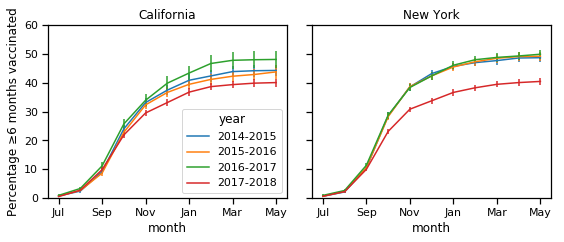

In [255]:
fig, ax = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(8, 3.5))
error = pivot_data['avg'] - pivot_data['LL']

state = 'California'

pivot_data['avg'][state].plot.line(yerr=error[state], title=state, ax=ax[0])
ax[0].set_xticklabels([ '', 'Jul',  'Sep', 'Nov', 'Jan', 'Mar', 'May'])

ax[0].set_ylim(0, 60)
ax[0].set_ylabel('Percentage ≥6 months vaccinated')

state = 'New York'

pivot_data['avg'][state].plot.line(yerr=error[state], title=state, ax=ax[1])
ax[1].get_legend().remove();
 
ax[1].set_xticklabels([ '', 'Jul',  'Sep', 'Nov', 'Jan', 'Mar', 'May']);

fig.tight_layout()

fig.savefig('figures/cdc_ground_truth.jpg', dpi=150)




# Baseline Model

Here we create a model which predicts the amount of flu vaccinations based on the the behavior of previous years.

In [256]:
cdc_data = pd.read_csv('data/cdc_average_bystate_2013-2017.csv')

In [274]:
cdc_data = cdc_data[cdc_data.state_or_region.isin(states)]

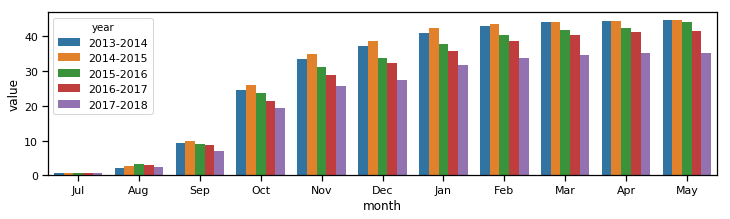

In [275]:
fig, ax = plt.subplots(figsize=(12, 3))

sns.barplot(x='month', y='value', hue='year', 
            hue_order=['2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018'],
            data=cdc_data[cdc_data.state_or_region=='Louisiana'], ax=ax)

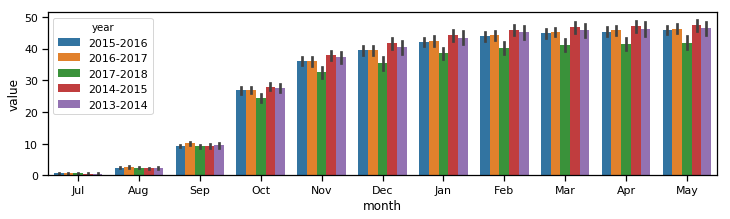

In [276]:
fig, ax = plt.subplots(figsize=(12, 3))

sns.barplot(x='month', y='value', hue='year', 
            data=cdc_data, ax=ax)

In [277]:
pivoted_data = pd.pivot_table(cdc_data, values='value', columns=['month', 'year'], index='state_or_region')

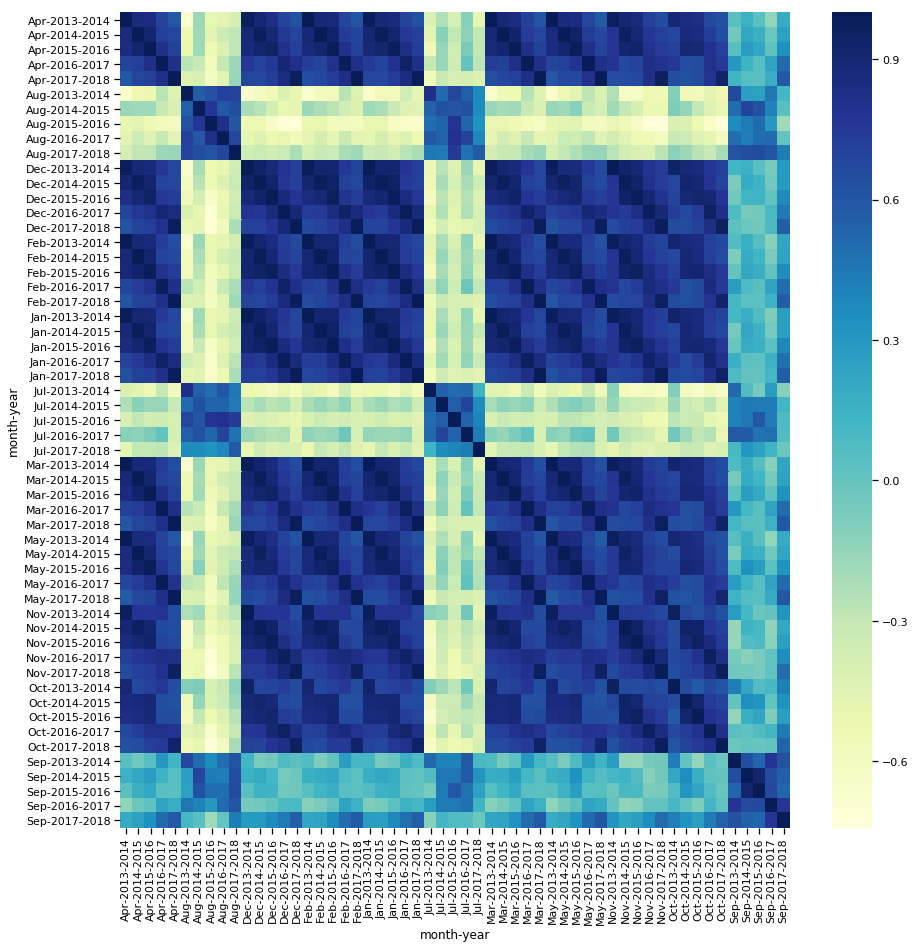

In [278]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(pivoted_data.corr(), cmap="YlGnBu", cbar=True, ax=ax)

In [279]:
# Taking the average of the first three years

In [280]:
cdc_data.year.unique()

array(['2015-2016', '2016-2017', '2017-2018', '2014-2015', '2013-2014'],
      dtype=object)

In [283]:
three_year_avg_13_16 = pd.pivot_table(cdc_data[cdc_data.year.isin(['2014-2015', '2015-2016'])],
                values='value', columns=['month'], index='state_or_region')

In [284]:
data_16_18 = pd.pivot_table(cdc_data[cdc_data.year.isin(['2016-2017', '2017-2018'])],
                values='value', columns=['year', 'month'], index='state_or_region')

In [285]:
def calculate_regression_squares_dataframes(dataframe1, dataframe2):
    diff = dataframe1 - dataframe2
    diff = diff**2
    return diff.sum(axis=1)

def calculate_total_varience(dataframe):
    diff = dataframe.subtract(dataframe.mean(axis=1), axis='rows')
    dif = diff**2
    return dif.sum(axis=1)

def calculate_coeff_varience(exp_df, model_df):
    return 1 - calculate_regression_squares_dataframes(exp_df, model_df)/calculate_total_varience(exp_df)

In [286]:
results_2016 = calculate_coeff_varience(data_16_18['2016-2017'], three_year_avg_13_16)

In [287]:
results_2017 = calculate_coeff_varience(data_16_18['2017-2018'], three_year_avg_13_16)

In [288]:
residuals = pd.concat([results_2016, results_2017], axis=1)

In [289]:
residuals.columns = ['2016-17', '2017-18']

In [290]:
len(residuals.index)

20

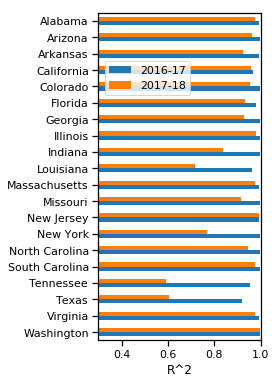

In [298]:
fig, ax = plt.subplots(figsize=(4,5.5))

residuals.sort_index(ascending=False).plot.barh(ax=ax).legend(bbox_to_anchor=(0.6, 0.8));
ax.set_xlabel('R^2');
ax.set_xlim(0.3, 1);
ax.set_ylabel('');

fig.tight_layout()

fig.savefig('figures/baseline_model_predictions.jpg', dpi=150)


In [270]:
residuals = residuals.sort_index(ascending=False)

In [299]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

In [300]:
mean_confidence_interval(residuals['2016-17'])

(0.986371655887343, 0.009699820940013329)

In [301]:
mean_confidence_interval(residuals['2017-18'])

(0.8960538589166107, 0.058919647459480445)

In [195]:
residuals.mean()

2016-17    0.986603
2017-18    0.915657
dtype: float64